In [8]:
from scipy import stats
from matplotlib.pyplot import *
from numpy import *
import fastIsing, SIS
import networkx as nx
from scipy import stats

graph = nx.barabasi_albert_graph(40, 1)
# graph = nx.path_graph(30, nx.DiGraph())

# base infection, prob infection inside, cure
params = array([.5, 1, \
                .5, 3, \
                1, .5 ])

model  = SIS.SIS(graph, params)
N = int(1e4)
res = model.simulate(N, verbose = True)

# fig, ax = subplots(); ax.imshow(res, aspect = 'auto')


n = res.shape[0]
delta = 5
cond  = {}
cc    = {}
state = {}

Z   = n - delta 
jdx = 1
from tqdm import tqdm_notebook as tqdm
for i in tqdm(range(delta, n - jdx)):
    tmp = res[i - delta: i + jdx]
    x =  tuple(res[i])
    state[x] = state.get(x, 0) + 1 / Z
    cond[x] = cond.get(x, zeros(tmp.shape)) +  tmp
    cc[x] = cc.get(x, 0) + 1
print(f'unique states {len(cond)}')    

H  = zeros((delta + jdx, model.nNodes))
px = zeros((delta + jdx, model.nNodes))

for key, value in tqdm(cond.items()):
    z = value / cc[key]
    assert all(z - 1 - z) == 1
    z[isnan(z)] = 0
    px += value / Z
    x = dstack((z * log2(z), (1 - z) * log2(1 - z)))
    x = nansum(x, -1)
    H += state[key] * x
tmp = nansum(dstack((px * log2(px), (1 - px) * log2(1 - px))), -1)
H  -= tmp






  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 39/10000 [00:00<00:26, 382.75it/s]

Simulation parameters
 number of samples: 10000
 step size 1
 pulse : {}




  1%|          | 83/10000 [00:00<00:24, 397.24it/s]

  1%|          | 124/10000 [00:00<00:24, 400.98it/s]

  2%|▏         | 167/10000 [00:00<00:24, 406.70it/s]

  2%|▏         | 209/10000 [00:00<00:23, 409.78it/s]

100%|██████████| 10000/10000 [00:29<00:00, 858.36it/s]

  3%|▎         | 294/10000 [00:00<00:23, 413.34it/s]

  3%|▎         | 336/10000 [00:00<00:23, 412.98it/s]

  4%|▍         | 377/10000 [00:00<00:23, 412.08it/s]

  4%|▍         | 419/10000 [00:01<00:23, 411.66it/s]

  5%|▍         | 460/10000 [00:01<00:23, 409.96it/s]

  5%|▌         | 501/10000 [00:01<00:23, 408.04it/s]

  5%|▌         | 544/10000 [00:01<00:22, 413.40it/s]

  6%|▌         | 587/10000 [00:01<00:22, 417.09it/s]

  6%|▋         | 629/10000 [00:01<00:22, 416.85it/s]

  7%|▋         | 671/10000 [00:01<00:22, 415.15it/s]

  7%|▋         | 713/10000 [00:01<00:22, 413.76it/s]

  8%|▊         | 755/10000 [00:01<00:22, 415.36it/s]

  8%|▊         | 797/10000 [00:01<00:22, 416.29it/s]

  8%|▊         | 839/1000

 57%|█████▋    | 5711/10000 [00:13<00:10, 419.23it/s]

 58%|█████▊    | 5754/10000 [00:13<00:10, 419.53it/s]

 58%|█████▊    | 5796/10000 [00:14<00:10, 414.89it/s]

 58%|█████▊    | 5838/10000 [00:14<00:10, 409.78it/s]

 59%|█████▉    | 5880/10000 [00:14<00:10, 411.51it/s]

 59%|█████▉    | 5922/10000 [00:14<00:09, 412.35it/s]

 60%|█████▉    | 5964/10000 [00:14<00:09, 409.77it/s]

 60%|██████    | 6005/10000 [00:14<00:09, 408.83it/s]

 60%|██████    | 6047/10000 [00:14<00:09, 411.28it/s]

 61%|██████    | 6089/10000 [00:14<00:09, 413.82it/s]

 61%|██████▏   | 6133/10000 [00:14<00:09, 420.33it/s]

 62%|██████▏   | 6176/10000 [00:14<00:09, 417.47it/s]

 62%|██████▏   | 6219/10000 [00:15<00:09, 418.64it/s]

 63%|██████▎   | 6261/10000 [00:15<00:09, 413.52it/s]

 63%|██████▎   | 6303/10000 [00:15<00:09, 397.39it/s]

 63%|██████▎   | 6344/10000 [00:15<00:09, 400.21it/s]

 64%|██████▍   | 6387/10000 [00:15<00:08, 407.05it/s]

 64%|██████▍   | 6429/10000 [00:15<00:08, 410.11it/s]

 65%|█████


unique states 9995


/home/casper/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log2
/home/casper/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply


[0.5 1. ]
[0.5 3. ]
[1.  0.5]


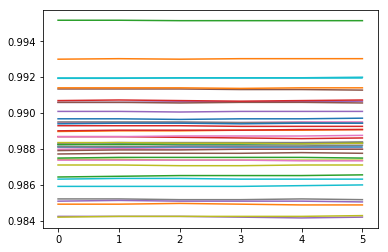

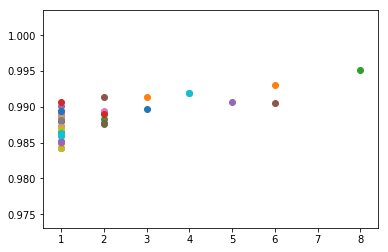

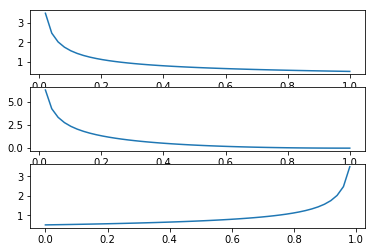



100%|██████████| 10000/10000 [00:40<00:00, 410.90it/s]

In [9]:
fig, ax = subplots(); ax.plot(H);
fig, ax = subplots()

for node, deg in nx.degree(graph):
    idx = model.mapping[node]
    ax.scatter(deg, H[-3, idx])
fig, ax = subplots(3)
x = linspace(0, 1)
for idx, i in enumerate(params.reshape(3, 2)):
    print(i)
    y = stats.beta.pdf(x, *i)
    ax[idx].plot(x, y)